## Загрузка библиотек

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler, StandardScaler, MaxAbsScaler
from sklearn.compose import ColumnTransformer
import numpy as np

## Загрузка данных

### Задание 1 (0.5 балла)

Для начала работы нам необходимо научиться читать набор данных. В данном домашнем задании мы поработаем с двумя наборами данных.

__covid.csv__ ([источник](https://www.kaggle.com/gpreda/covid-world-vaccination-progress)) - статистика по вакцинированию от COVID19 по разным странам. Для данного датасета нет конкретной предсказательной переменной.

__hr.csv__ ([источник](https://www.kaggle.com/arashnic/hr-analytics-job-change-of-data-scientists)) - набор данных большего размера. Он содержит статистику по людям, проходящим курсы по Big Data & ML. _Target_ - 1 или 0, сменил ли человек работу после прохождения курсов - или нет.

Реализуйте методы `read_covid_dataset` и `read_hr_dataset`. Каждый из них принимает на вход путь к набору данных и возвращает выборку `X` и соответствующие метки `y`. В случае _covid_ датасета `y` возвращается как `None`. 

In [2]:
def read_covid_dataset(path_to_csv):
    # Возвращает пару из X и y. X - массив векторов. y - соответствующие векторам метки
    data = pd.read_csv(path_to_csv, sep=',')
    return data, None


def read_hr_dataset(path_to_csv):
    # Возвращает пару из X и y. X - массив векторов. y - соответствующие векторам метки
    data = pd.read_csv(path_to_csv, sep=',')
    y = data['target']
    data.drop('target', axis=1, inplace=True)
    return data, y

In [3]:
COVID_DATA_PATH = '/home/ivankozlov98/Learning/Bio_ML/Homeworks/Hw1/hw1/hw_EDA_data/covid.csv'
HR_DATA_PATH = '/home/ivankozlov98/Learning/Bio_ML/Homeworks/Hw1/hw1/hw_EDA_data/hr.csv'

In [4]:
X_covid, _ = read_covid_dataset(COVID_DATA_PATH)
X_hr, y_hr = read_hr_dataset(HR_DATA_PATH)

## EDA

### Задание 2 (3.5 балла)

Выполните задание для датасетa _hr_.

Для дальнейшей работы с данными нужно обработать пропущенные значения в датасете.
Существуют различные стратегии обработки пропущенных данных.

#### 1. (0.5 балла)

Для числовых признаков постройте распределения признаков. Для категориальных признаков выведите статистику по количеству значений признака.

In [5]:
X_hr.head(5)

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8


<AxesSubplot:xlabel='city', ylabel='Count'>

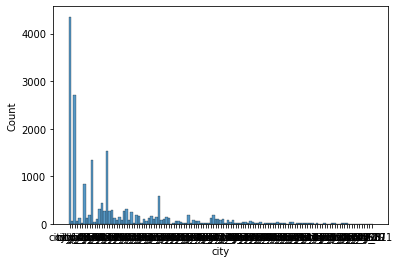

In [6]:
sns.histplot(X_hr.city)

<AxesSubplot:xlabel='gender', ylabel='Count'>

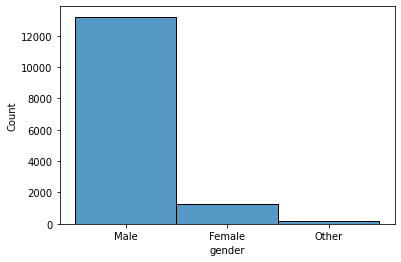

In [7]:
sns.histplot(X_hr.gender)

<AxesSubplot:xlabel='education_level', ylabel='Count'>

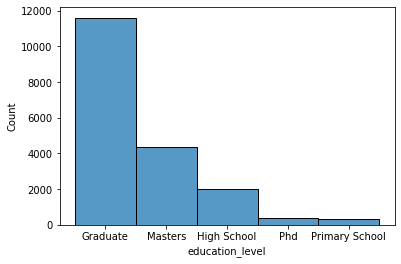

In [8]:
sns.histplot(X_hr.education_level)

In [9]:
def get_names_categ_columns(df):
    cols = df.columns
    num_cols = df._get_numeric_data().columns
    return list(set(cols) - set(num_cols))

In [10]:
def get_names_num_columns(df):
    categ_cols = get_names_categ_columns(df)
    return list(set(list(df.columns.values)) - set(categ_cols))

In [11]:
def stat_categ(df):
    categ_cols = get_names_categ_columns(df)
    for name_column in categ_cols:
        print(df.groupby(name_column).size())
        print()

In [12]:
stat_categ(X_hr)

education_level
Graduate          11598
High School        2017
Masters            4361
Phd                 414
Primary School      308
dtype: int64

experience
1       549
10      985
11      664
12      494
13      399
14      586
15      686
16      508
17      342
18      280
19      304
2      1127
20      148
3      1354
4      1403
5      1430
6      1216
7      1028
8       802
9       980
<1      522
>20    3286
dtype: int64

gender
Female     1238
Male      13221
Other       191
dtype: int64

last_new_job
1        8040
2        2900
3        1024
4        1029
>4       3290
never    2452
dtype: int64

company_size
10/49        1471
100-500      2571
1000-4999    1328
10000+       2019
50-99        3083
500-999       877
5000-9999     563
<10          1308
dtype: int64

major_discipline
Arts                 253
Business Degree      327
Humanities           669
No Major             223
Other                381
STEM               14492
dtype: int64

city
city_1       26
city_10 

array([[<AxesSubplot:title={'center':'enrollee_id'}>,
        <AxesSubplot:title={'center':'city_development_index'}>],
       [<AxesSubplot:title={'center':'training_hours'}>, <AxesSubplot:>]],
      dtype=object)

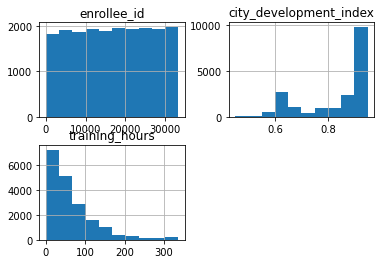

In [13]:
X_hr.hist()

#### 2. (0.5 балла)
Удалите все строки, где есть хотя бы одно пропущенное значение признака. Насколько сильно уменьшился размер датасета? Как изменились распределения признаков/статистика по количеству значений признаков?

In [14]:
print(f'Исходный размер датасета hr {len(X_hr.index)}')

Исходный размер датасета hr 19158


In [15]:
X_hr_dropna = X_hr[~X_hr.isnull().any(axis=1)].reset_index(drop=True)

In [16]:
print(f'Pазмер датасета hr без NaN {len(X_hr_dropna.index)}')

Pазмер датасета hr без NaN 8955


In [17]:
stat_categ(X_hr_dropna)

education_level
Graduate    6252
Masters     2449
Phd          254
dtype: int64

experience
1       121
10      551
11      372
12      293
13      235
14      333
15      398
16      304
17      206
18      168
19      179
2       297
20       86
3       428
4       480
5       575
6       535
7       485
8       398
9       533
<1       97
>20    1881
dtype: int64

gender
Female     804
Male      8073
Other       78
dtype: int64

last_new_job
1        3838
2        1570
3         610
4         599
>4       1965
never     373
dtype: int64

company_size
10/49         951
100-500      1814
1000-4999     930
10000+       1449
50-99        1986
500-999       592
5000-9999     393
<10           840
dtype: int64

major_discipline
Arts                129
Business Degree     170
Humanities          378
No Major            112
Other               177
STEM               7989
dtype: int64

city
city_1       13
city_10      52
city_100     82
city_101     24
city_102    126
           ... 
city_9

<AxesSubplot:xlabel='city', ylabel='Count'>

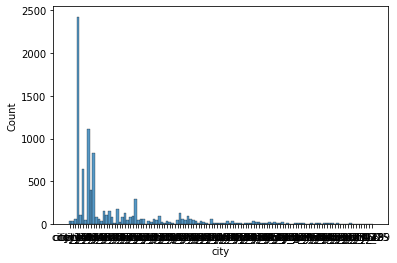

In [18]:
sns.histplot(X_hr_dropna.city)

<AxesSubplot:xlabel='education_level', ylabel='Count'>

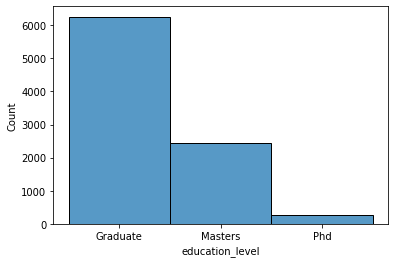

In [19]:
sns.histplot(X_hr_dropna.education_level)

<AxesSubplot:xlabel='gender', ylabel='Count'>

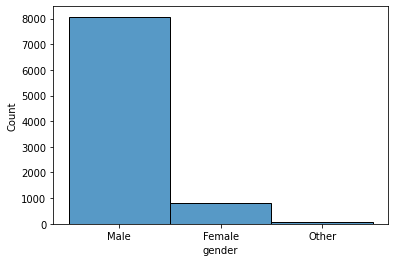

In [20]:
sns.histplot(X_hr_dropna.gender)

array([[<AxesSubplot:title={'center':'enrollee_id'}>,
        <AxesSubplot:title={'center':'city_development_index'}>],
       [<AxesSubplot:title={'center':'training_hours'}>, <AxesSubplot:>]],
      dtype=object)

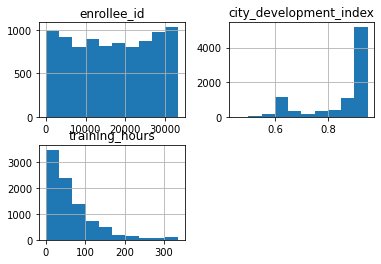

In [21]:
X_hr_dropna.hist()

_Ваш ответ:_  размер датасета уменьшился в 2 раза. Распределения числовых и категориальных признаков не изменилось. Статистики кат.признаков уменьшились в 2 раза.

Давайте попробуем избежать сокращения размера датасета.

#### 3.  (1 балл)
Для числовых признаков заполните пропущенные данные средним/медианой/модой данного признака. Объясните свой выбор. (Часть строк с NaN значениями можно удалить, если размер датасета уменьшится <15%)

__Выбор__

Заполним пропущенные данные числовых признаков средним. Потому что: на моду имеет смысл менять только, если возможных значений признака фиксированно и немного (например, в случае категориальных признаков); среднее зависит от наличия выбросов в данных, но судя по распределению, полученному на предыдущем шаге их нет (иначе была бы взята медиана)

In [22]:
enrollee_id_mean = X_hr.enrollee_id.mean()
city_development_index_mean = X_hr.city_development_index.mean()
training_hours_mean = X_hr.training_hours.mean()

In [23]:
X_hr.training_hours.isnull().any()

False

In [24]:
X_hr.city_development_index.isnull().any()

False

In [25]:
X_hr.training_hours.isnull().any()

False

In [26]:
y_hr.isnull().any()

False

#### 4.  (1 балл)
Для категориальных признаков заполните пропущенные значения самой встречающейся категорией или создайте отдельную категорию пропущенных значений. Объясните свой выбор. (Часть строк с NaN значениями можно удалить, если размер датасета уменьшится <15%)

_Ваш ответ:_ Для категориальных признаков, в которых большое количество значений пропущено, следует создавать новую категорию (кроме признака `gender` -- в нём непонятно какую новую категорию можно создать), в остальных случаях меняем `None` на самую встречающуюся категорию.

In [27]:
def fill_na(X, y):
    # Возвращает данные без NaN значений
    X_fill, y_fill = X.copy(), y.copy()
    #
    categ_columns = get_names_categ_columns(X)
    for categ_column in categ_columns:
        cur_column = X_fill.loc[:, categ_column] 
        if float(cur_column[cur_column.isnull()].size) / float(cur_column.size) > 0.1 or categ_column == 'gender':
            cur_mode = cur_column[~cur_column.isnull()].mode()[0]
            X_fill.loc[cur_column.isnull(), categ_column] = cur_mode
        else:
            X_fill.loc[cur_column.isnull(), categ_column] = f'new_category_{categ_column}'
    
    return X_fill, y_fill

In [28]:
X_hr_fill, y_hr_fill = fill_na(X_hr, y_hr)

In [29]:
X_hr_fill.head(5)

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,1,36
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47
2,11561,city_21,0.624,Male,No relevent experience,Full time course,Graduate,STEM,5,50-99,Pvt Ltd,never,83
3,33241,city_115,0.789,Male,No relevent experience,new_category_enrolled_university,Graduate,Business Degree,<1,50-99,Pvt Ltd,never,52
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8


#### 5.  (0.5 балла)
Как изменились распределения признаков/статистика по количеству значений признаков после заполнения пропущенных данных?

In [30]:
# YOUR_CODE -- unnecessary

_Ваш ответ:_  В числовых признаках пропусков не было, поэтому и изменений не произошло. В категориальных признаках: в которых добавилась новая категория, статистика пополнилась этим новым полем; в остальных кат.признаках мода стала ещё больше 

### Задание 3  (1 балл)

Выполните задание для датасета _covid_.

1. Найдите страну, для которой в датасете присутствует 46 дат со статистикой по вакцинации.
2. Постройте для этой страны график зависимости _total_vaccinations_ от _date_.
3. Заполните пропущенные данные о _total_vaccinations_ для этой страны. Объясните свой выбор.

In [31]:
tmp = X_covid.groupby('country').size() 
tmp[tmp == 46]

country
Bahrain    46
dtype: int64

In [32]:
Bahrain_view = X_covid[X_covid['country'] == 'Bahrain']

In [33]:
(Bahrain_view.groupby('date').size()).size

46

<AxesSubplot:xlabel='date', ylabel='total_vaccinations'>

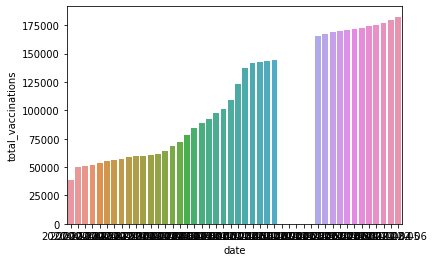

In [34]:
sns.barplot(x=Bahrain_view['date'], y=Bahrain_view['total_vaccinations'])

In [35]:
date_column_null = (Bahrain_view[Bahrain_view['total_vaccinations'].isnull()]).sort_values(by=['date'])['date']

In [36]:
date_column_null

107    2021-01-21
108    2021-01-22
109    2021-01-23
110    2021-01-24
111    2021-01-25
Name: date, dtype: object

In [37]:
date_column_not_null = (Bahrain_view[~Bahrain_view['total_vaccinations'].isnull()]).sort_values(by=['date'])['date']

In [38]:
left_date = date_column_not_null[date_column_not_null <= '2021-01-21'].iloc[-1]
right_date = date_column_not_null[date_column_not_null >= '2021-01-25'].iloc[0]

In [39]:
left_date, right_date

('2021-01-20', '2021-01-26')

In [40]:
left_total_vacc = Bahrain_view[Bahrain_view['date'] == left_date]['total_vaccinations'].iloc[0]
right_total_vacc = Bahrain_view[Bahrain_view['date'] == right_date]['total_vaccinations'].iloc[0]

In [41]:
left_total_vacc, right_total_vacc

(144130.0, 165953.0)

In [42]:
Bahrain_view.loc[Bahrain_view['total_vaccinations'].isnull(), 'total_vaccinations'] = (left_total_vacc + right_total_vacc) / 2.0

/home/ivankozlov98/environments/my_env/lib/python3.8/site-packages/pandas/core/indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


<AxesSubplot:xlabel='date', ylabel='total_vaccinations'>

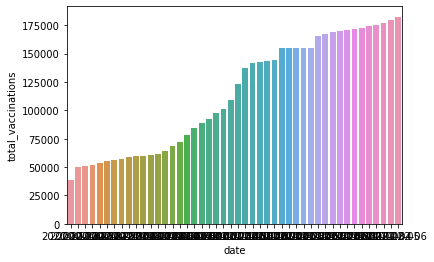

In [43]:
sns.barplot(x=Bahrain_view['date'], y=Bahrain_view['total_vaccinations'])

In [44]:
X_covid.loc[(X_covid['country'] == 'Bahrain') & X_covid['total_vaccinations'].isnull(), 'total_vaccinations'] = (left_total_vacc + right_total_vacc) / 2.0

_Ваш ответ:_ отсутствует данные на непрерывном промежутке времени (left_date, right_date). По графику  видно, что `total_vaccinations` монотонно возрастает по дате => т.к. мы не знаем точный рост на пропущенном промежутке -- безопаснее всего заменить на константу, вычисленную как сумма известных значений `total_vaccinations` на концах этого промежутка пополам.

### Задание  4 (0.5 балла)
Выполните задание для датасета _hr_.

Есть ли в данных выбросы? Если да, то скажите, какие и почему Вы считаете их выбросами?


In [45]:
def get_bounds(df, name_column):
    q1 = df[name_column].quantile(0.25)
    q2 = df[name_column].quantile(0.75)
    IQR = q2 - q1
    lower_bound = q1 - 3 * IQR
    upper_bound = q2 + 3 * IQR
    return lower_bound, upper_bound

In [46]:
def is_has_outlieres(X, name_column):
    l, r = get_bounds(X, name_column)
    return X[name_column][X[name_column] > r].size + X[name_column][X[name_column] < l].size > 0

In [47]:
num_columns = get_names_num_columns(X_covid)
for column in num_columns:
    if is_has_outlieres(X_covid, column):
        print(f'{column} has outlieres')

people_vaccinated_per_hundred has outlieres
daily_vaccinations has outlieres
daily_vaccinations_raw has outlieres
people_fully_vaccinated_per_hundred has outlieres
people_fully_vaccinated has outlieres
total_vaccinations_per_hundred has outlieres
people_vaccinated has outlieres
total_vaccinations has outlieres
daily_vaccinations_per_million has outlieres


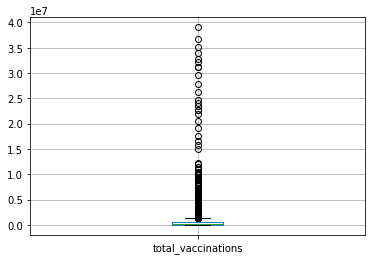

In [48]:
figure=X_covid.boxplot(column='total_vaccinations')

/home/ivankozlov98/environments/my_env/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='total_vaccinations', ylabel='Density'>

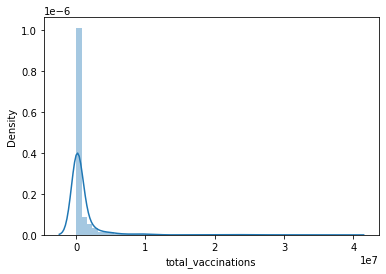

In [49]:
X_covid['total_vaccinations']
sns.distplot(X_covid['total_vaccinations'].dropna())

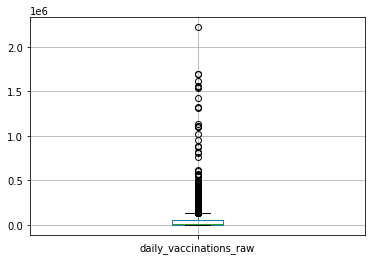

In [50]:
figure=X_covid.boxplot(column='daily_vaccinations_raw')

/home/ivankozlov98/environments/my_env/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='daily_vaccinations_raw', ylabel='Density'>

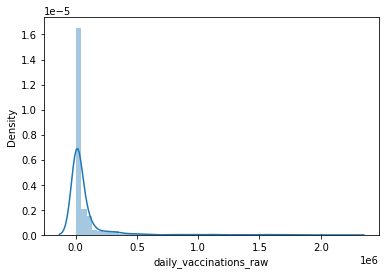

In [51]:
sns.distplot(X_covid['daily_vaccinations_raw'].dropna())

_Ваш ответ:_ во всех числовых признаках присутствуют выбросы. В данном случае выбросы определяются как точки, которые выходят за интервал `(q1-3*IQR, q2+3*IQR)`, где `q1` - 25% квантиль, `q2` - 75% квантиль.

### Задание  5 (1 балл)
Выполните задание для датасета _hr_.

Закодируйте категориальные признаки при помощи One-hot encoding/Label encoding/Frequency encoding. Объясните свой выбор. (Обратите внимание, что некоторые категориальные признаки предполагают ранжирование в своих значениях)


In [52]:
def Onehot_encoding(X, old_name_column):
    onehot_columns = pd.get_dummies(X[[old_name_column]])
    X = pd.concat([X, onehot_columns], axis=1)
    X.drop([old_name_column], inplace=True, axis=1)
    return X

In [53]:
def Label_encoding(X, name_column, le):
    new_values = le.fit_transform(X[name_column])    
    X.drop([name_column], inplace=True, axis=1)
    X[name_column] = new_values
    return X

In [54]:
def encode(X):
    # Возвращает данные без категориальных признаков
    categ_columns = get_names_categ_columns(X)
    ranked_columns = ['education_level', 'company_size', 'last_new_job', 'experience']
    X_encode = X.copy()
    le = LabelEncoder()
    for name_column in categ_columns:
        cnt_dif_vals = X.groupby(name_column).size().size
        if (cnt_dif_vals <= 10) and (name_column not in ranked_columns):
            X_encode = Onehot_encoding(X_encode, name_column)
        else:
            X_encode = Label_encoding(X_encode, name_column, le)
        
    return X_encode

In [55]:
X_hr_fill.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,1,36
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47
2,11561,city_21,0.624,Male,No relevent experience,Full time course,Graduate,STEM,5,50-99,Pvt Ltd,never,83
3,33241,city_115,0.789,Male,No relevent experience,new_category_enrolled_university,Graduate,Business Degree,<1,50-99,Pvt Ltd,never,52
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8


In [56]:
X_hr_encode = encode(X_hr_fill)

In [57]:
X_hr_encode.head()

,enrollee_id,city_development_index,training_hours,education_level,experience,gender_Female,gender_Male,gender_Other,last_new_job,company_size,...,enrolled_university_Full time course,enrolled_university_Part time course,enrolled_university_new_category_enrolled_university,enrolled_university_no_enrollment,company_type_Early Stage Startup,company_type_Funded Startup,company_type_NGO,company_type_Other,company_type_Public Sector,company_type_Pvt Ltd
0,8949,0.920,36,0,21,0,1,0,0,4,...,0,0,0,1,0,0,0,0,0,1
1,29725,0.776,47,0,6,0,1,0,4,4,...,0,0,0,1,0,0,0,0,0,1
2,11561,0.624,83,0,15,0,1,0,5,4,...,1,0,0,0,0,0,0,0,0,1
3,33241,0.789,52,0,20,0,1,0,5,4,...,0,0,1,0,0,0,0,0,0,1
4,666,0.767,8,2,21,0,1,0,3,4,...,0,0,0,1,0,1,0,0,0,0


_Ваш ответ:_ согласно (https://towardsdatascience.com/all-about-categorical-variable-encoding-305f3361fd02?gif=true) `frequency encoding` используем, когда знаем, что частота значений как-то связана с таргетом -- но про данные `X_hr` сложно определить такие признаки - поэтому рассматриваем только One-hot encoding/Label encoding. One-hot encoding используем когда возможных значений признака невелико(<=10) и эти значения не предполагают ранжирования. Во всех остальных случаях используем Label encoding.

Таким образом:



### Задание  5 (1 балл)
Выполните задание для датасета _hr_.




#### 1.  (1 балл)
Реализуйте функцию undersampling

#### 2.  (1 балл)
Реализуйте функцию oversampling

In [58]:
def undersampling(X, y):
    # Возвращает данные, сбалансированные методом undersampling
    data_under = X.copy()
    target_column = 'Target'
    data_under[target_column] = y.copy()
    
    data_under = data_under.sample(frac=1)
    
    view_bad = data_under[data_under[target_column] == 0]
    view_good = data_under[data_under[target_column] == 1]
    
    bad_l, good_l = len(view_bad.index), len(view_good.index) 
    if bad_l < good_l:
        view_good = view_good[:bad_l]
    else:
        view_bad = view_bad[:good_l]
    data_under = pd.concat([view_bad, view_good], axis=0)
    
    y_under = data_under[target_column]
    X_under = data_under.drop([target_column], axis=1)
    return X_under, y_under

def oversampling(X, y):
    # Возвращает данные, сбалансированные методом oversampling
    data_over = X.copy()
    target_column = 'Target'
    data_over[target_column] = y.copy()
    
    view_bad = data_over[data_over[target_column] == 0]
    view_good = data_over[data_over[target_column] == 1]
    
    bad_l, good_l = len(view_bad.index), len(view_good.index) 
    if bad_l < good_l:
        weight = int(round(good_l / bad_l))
        repeats = pd.concat((weight - 1) * [view_bad], axis=0)
    else:
        weight = int(round(bad_l / good_l))
        repeats = pd.concat((weight - 1) * [view_good], axis=0)
    data_over = pd.concat([data_over, repeats], axis=0)
    
    y_over = data_over[target_column]
    X_over = data_over.drop([target_column], axis=1)
    return X_over, y_over

In [59]:
X_hr_under, y_hr_under = undersampling(X_hr_encode, y_hr_fill)

X_hr_over, y_hr_over = oversampling(X_hr_encode, y_hr_fill)

In [60]:
len(X_hr_under.index)

9554

In [61]:
len(X_hr_over.index)

28712

#### 3.  (1 балл)
Используйте _SMOTE_ для балансировки датасета.

Помимо методов _undersampling_ и _oversampling_ существует подход, генерирующий элементы класса-меньшинства, похожие на уже присутствующие в выборке данных. Такой метод называется _Synthetic Minority Oversampling Technique_ (SMOTE). 

Метод _SMOTE_ , реализованный в библиотеке `imblearn`, генерирует синтетические примеры при помощи __k-nearest neighbor__ алгоритма (подробнее об этом алгоритме будет рассказано на лекции).

In [62]:
# !pip3 install -U imbalanced-learn

In [63]:
# !pip3 install delayed

In [64]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_hr_SMOTE, y_hr_SMOTE = smote.fit_resample(X_hr_encode, y_hr_fill)

#### 4. (0.5 балла)
Как изменились распределения признаков при различных тактиках балансирования датасета?

<ipython-input-65-c7013f5f4866>:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  X_hr_encode.hist(ax=ax)


array([[<AxesSubplot:title={'center':'enrollee_id'}>,
        <AxesSubplot:title={'center':'city_development_index'}>,
        <AxesSubplot:title={'center':'training_hours'}>,
        <AxesSubplot:title={'center':'education_level'}>,
        <AxesSubplot:title={'center':'experience'}>],
       [<AxesSubplot:title={'center':'gender_Female'}>,
        <AxesSubplot:title={'center':'gender_Male'}>,
        <AxesSubplot:title={'center':'gender_Other'}>,
        <AxesSubplot:title={'center':'last_new_job'}>,
        <AxesSubplot:title={'center':'company_size'}>],
       [<AxesSubplot:title={'center':'major_discipline_Arts'}>,
        <AxesSubplot:title={'center':'major_discipline_Business Degree'}>,
        <AxesSubplot:title={'center':'major_discipline_Humanities'}>,
        <AxesSubplot:title={'center':'major_discipline_No Major'}>,
        <AxesSubplot:title={'center':'major_discipline_Other'}>],
       [<AxesSubplot:title={'center':'major_discipline_STEM'}>,
        <AxesSubplot:title={'

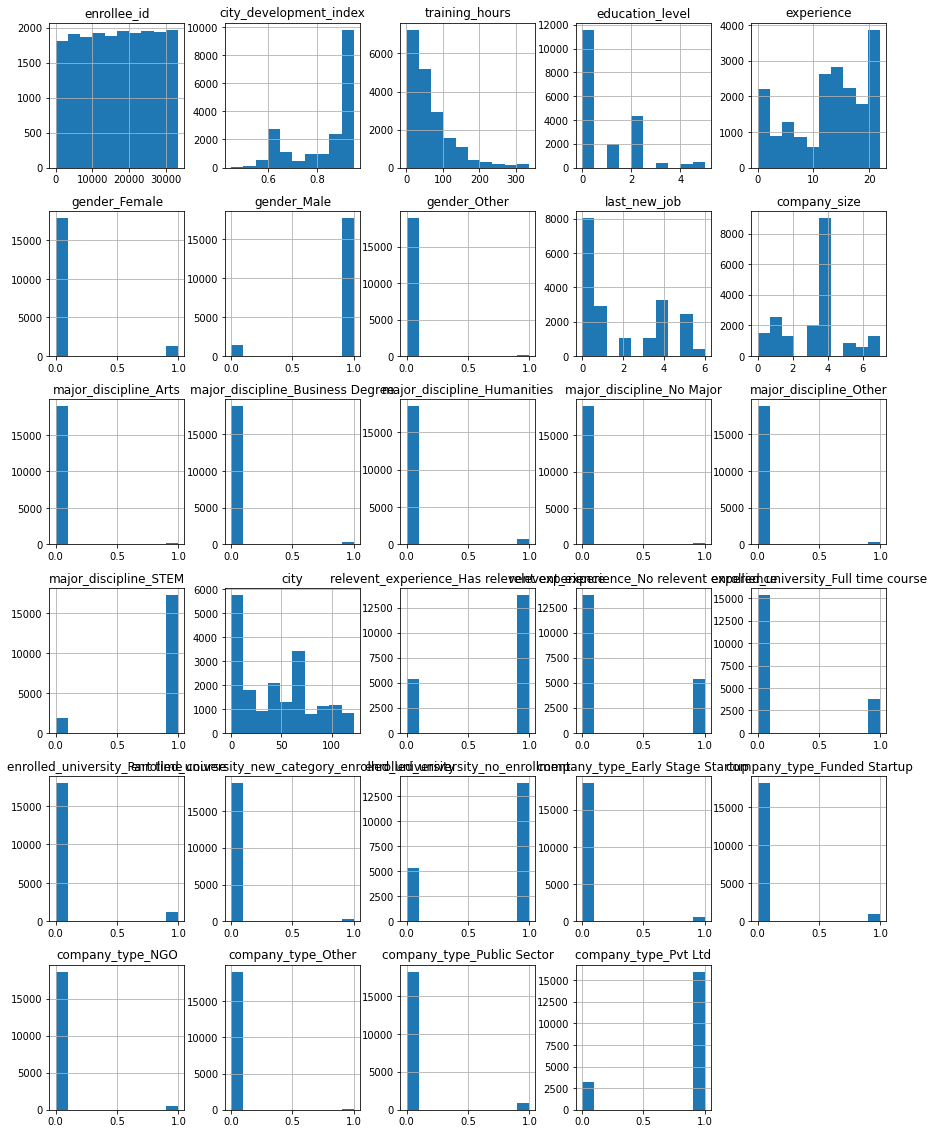

In [65]:
# before changes
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
X_hr_encode.hist(ax=ax)

<ipython-input-66-13970013d53f>:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  X_hr_over.hist(ax=ax)


array([[<AxesSubplot:title={'center':'enrollee_id'}>,
        <AxesSubplot:title={'center':'city_development_index'}>,
        <AxesSubplot:title={'center':'training_hours'}>,
        <AxesSubplot:title={'center':'education_level'}>,
        <AxesSubplot:title={'center':'experience'}>],
       [<AxesSubplot:title={'center':'gender_Female'}>,
        <AxesSubplot:title={'center':'gender_Male'}>,
        <AxesSubplot:title={'center':'gender_Other'}>,
        <AxesSubplot:title={'center':'last_new_job'}>,
        <AxesSubplot:title={'center':'company_size'}>],
       [<AxesSubplot:title={'center':'major_discipline_Arts'}>,
        <AxesSubplot:title={'center':'major_discipline_Business Degree'}>,
        <AxesSubplot:title={'center':'major_discipline_Humanities'}>,
        <AxesSubplot:title={'center':'major_discipline_No Major'}>,
        <AxesSubplot:title={'center':'major_discipline_Other'}>],
       [<AxesSubplot:title={'center':'major_discipline_STEM'}>,
        <AxesSubplot:title={'

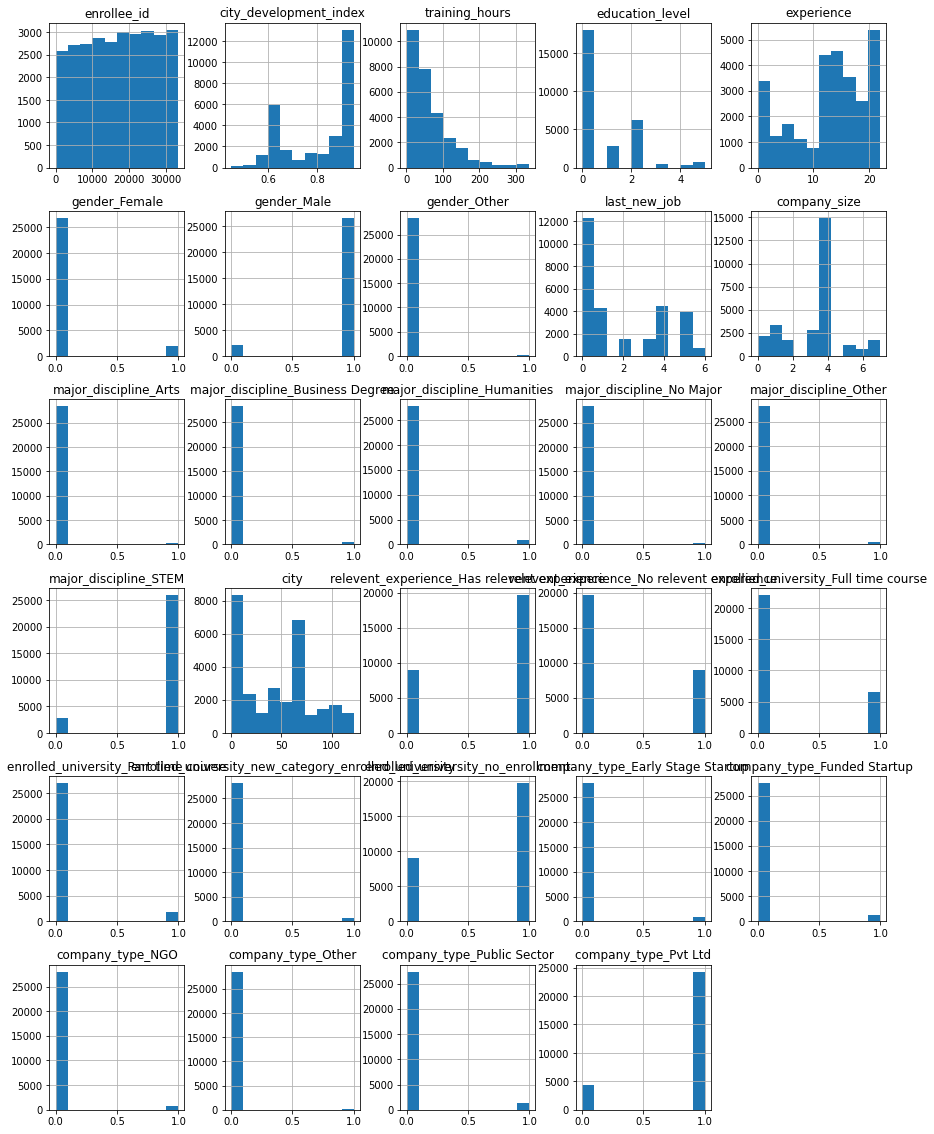

In [66]:
# after first tactic
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
X_hr_over.hist(ax=ax)

<ipython-input-67-14bc07607530>:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  X_hr_SMOTE.hist(ax=ax)


array([[<AxesSubplot:title={'center':'enrollee_id'}>,
        <AxesSubplot:title={'center':'city_development_index'}>,
        <AxesSubplot:title={'center':'training_hours'}>,
        <AxesSubplot:title={'center':'education_level'}>,
        <AxesSubplot:title={'center':'experience'}>],
       [<AxesSubplot:title={'center':'gender_Female'}>,
        <AxesSubplot:title={'center':'gender_Male'}>,
        <AxesSubplot:title={'center':'gender_Other'}>,
        <AxesSubplot:title={'center':'last_new_job'}>,
        <AxesSubplot:title={'center':'company_size'}>],
       [<AxesSubplot:title={'center':'major_discipline_Arts'}>,
        <AxesSubplot:title={'center':'major_discipline_Business Degree'}>,
        <AxesSubplot:title={'center':'major_discipline_Humanities'}>,
        <AxesSubplot:title={'center':'major_discipline_No Major'}>,
        <AxesSubplot:title={'center':'major_discipline_Other'}>],
       [<AxesSubplot:title={'center':'major_discipline_STEM'}>,
        <AxesSubplot:title={'

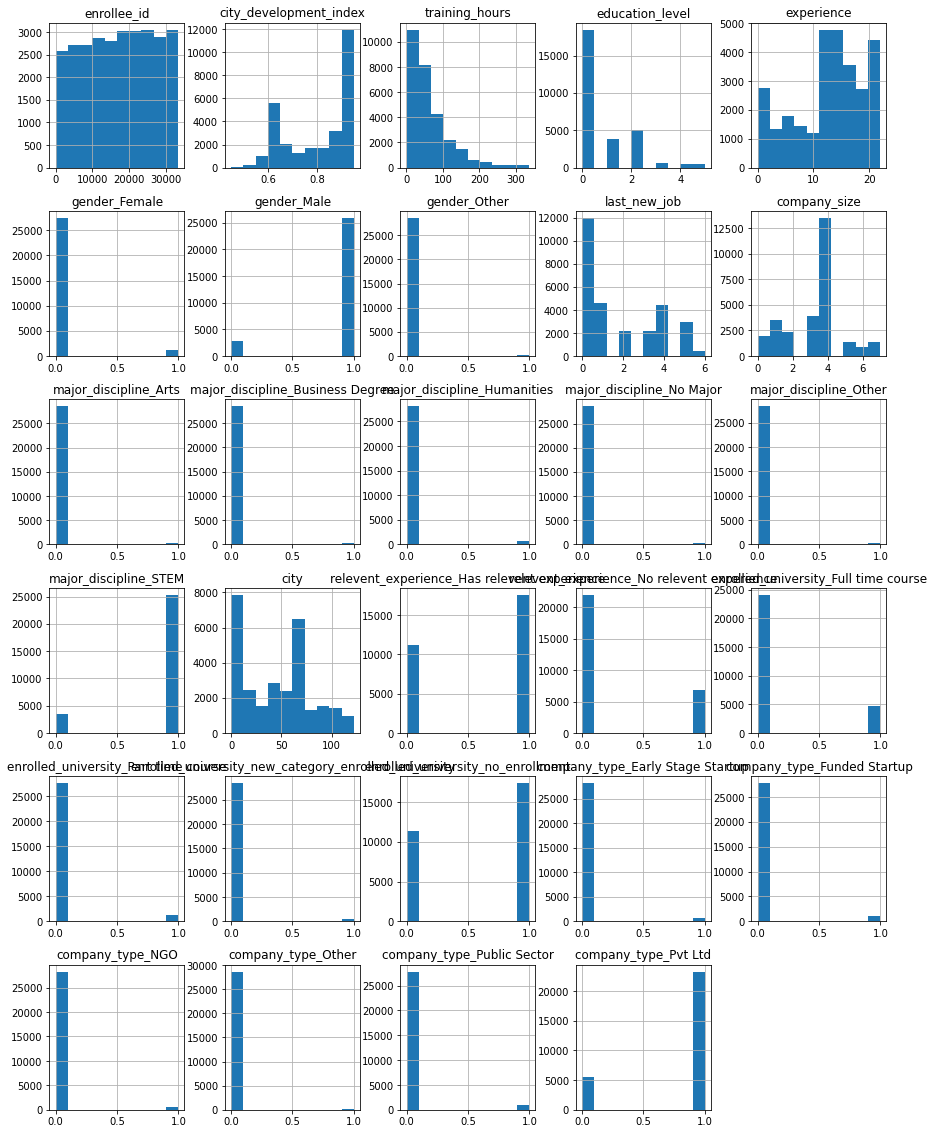

In [67]:
# after second tactic
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
X_hr_SMOTE.hist(ax=ax)

_Ваш ответ:_ так как нет сильной корреляции между таргетом и каким-либо признаком, то распределения не сильно поменялись в 2 стратегиях